# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [21]:
from sklearn import svm
from sklearn import datasets

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

## Step1. 下載資料

In [22]:
# 載入sklearn內建的乳癌資料集
breast_cancer=datasets.load_breast_cancer()

In [5]:
features=breast_cancer.data
# 取出目標變數（標籤）
target=breast_cancer.target
print(breast_cancer.keys())
print(breast_cancer.feature_names)
print(breast_cancer.target_names)
# print(features)
# print(target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [6]:
target_names=breast_cancer.target_names
print(target_names) #['malignant' 'benign']
labels=target_names[target]
# labels

['malignant' 'benign']


In [15]:
X = breast_cancer.data
y = breast_cancer.target.astype(float)

## Step2. 區分訓練集與測試集

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Step3. 建模

In [26]:
param_grid = {
    'C': [0, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

clf=svm.SVR()
clf_search = GridSearchCV(clf, param_grid, cv=5, scoring='r2')
clf_search.fit(X_train, y_train)
best_clf = clf_search.best_estimator_
print(f"最佳參數: {clf_search.best_params_}")

最佳參數: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py", line

## Step4. 預測

```

```


In [27]:
y_pred = best_clf.predict(X_test)
print(y_pred)

[ 2.92888769e-01  9.92359136e-01  1.07185696e+00  6.96443306e-01
  1.23511133e+00  1.00453938e+00  1.06606352e+00  1.06259122e+00
  9.11763378e-01  1.01063346e+00  6.53006128e-01  7.65295189e-01
  9.56442765e-01  4.26502044e-01  7.21524005e-01  1.20114537e-01
  8.89478060e-01 -6.59544347e-03 -1.04409368e-01  3.65132196e-02
 -2.04413760e-01  3.14930271e-01  9.92558943e-01  9.49881568e-01
 -2.17274445e-01  9.13370406e-01  9.90731946e-01  7.75939530e-01
  1.00872050e+00  1.07003447e-01  1.14779944e+00  5.04190020e-02
  7.84979627e-01  2.11441665e-02  1.00758271e+00  3.83823043e-03
  8.11896195e-01 -2.28092639e-02  9.46240524e-01  6.77606866e-02
  4.33028551e-01  9.26494591e-01  8.05941325e-02  1.01445006e+00
  5.84021272e-01  2.07372743e-02  9.55585037e-01  9.20214465e-01
  1.08626895e+00  1.71561253e-01 -2.01590775e-01  7.10044363e-01
  2.03546728e-02  1.02247885e+00  1.01187723e+00  1.05465604e+00
  1.03339288e+00  9.52066094e-01  1.02036845e+00 -4.80652084e-02
  4.41120877e-01 -9.11165

## Step5. 準確度分析

In [29]:
print(best_clf.score(X_train, y_train))
print(best_clf.score(X_test, y_test))

0.7795976541327622
0.8197078278553209


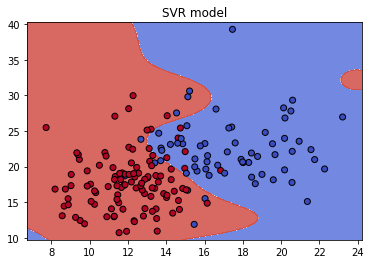

In [37]:
X_vis = X[:, :2]  # 僅使用 mean radius 和 mean texture
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=0)
model_vis = svm.SVR(kernel=clf_search.best_params_['kernel'], 
                    C=clf_search.best_params_['C'], 
                    gamma=clf_search.best_params_['gamma'])
model_vis.fit(X_train_vis, y_train_vis)

def SVR_plot(X, y, model):
    grid=0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid), np.arange(y_min, y_max, grid))
    
    # 預測網格點並轉為分類標籤
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z >= 0.5).astype(int).reshape(xx.shape)
    
    # 繪製決策邊界
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title('SVR model')
    plt.show()
    
SVR_plot(X_test_vis, y_test_vis, model_vis)